In [1]:
# Install CatBoost library, a popular gradient boosting framework for machine learning
!pip install catboost

# Importing essential libraries
import pandas as pd               # For data manipulation and analysis
import numpy as np                # For numerical computations
import seaborn as sns             # For data visualization
import matplotlib.pyplot as plt   # Another library for plotting data
import missingno as msno          # For visualizing missing data
from scipy import stats           # For statistical functions
from scipy.stats import norm      # For working with normal distribution

# Importing machine learning preprocessing and metrics
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error  # For evaluating model performance

# Importing model selection and validation tools
from sklearn.model_selection import train_test_split, cross_val_score  # For splitting data and performing cross-validation

# Importing statistical modeling tools
import statsmodels.api as sm  # For building statistical models
from sklearn.feature_selection import RFE  # Recursive feature elimination for feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor  # For calculating VIF to check multicollinearity

# Importing regression models from different libraries
from catboost import CatBoostRegressor  # CatBoost regression model
from sklearn.linear_model import BayesianRidge, HuberRegressor, Ridge, OrthogonalMatchingPursuit, LinearRegression, Lasso, ElasticNet  # Various linear models
from sklearn.svm import SVR  # Support Vector Regression
from sklearn import metrics  # For performance evaluation
from sklearn.tree import DecisionTreeRegressor  # Decision Tree for regression
from lightgbm import LGBMRegressor  # LightGBM regression model
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor  # Ensemble models for regression
from xgboost import XGBRegressor  # XGBoost regression model

# Additional tools for model selection and hyperparameter tuning
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV  # For k-fold cross-validation and grid search

# Importing libraries to handle zip files and file system operations
import zipfile  # To work with zip files
import os       # To interact with the operating system for file paths and directories
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
# Using wget to download the UK Used Car Dataset from a Dropbox link
# The dataset will be saved as "UK_Used_Car_Dataset.zip" in the current working directory
!wget -O UK_Used_Car_Dataset.zip https://www.dropbox.com/scl/fi/k3ba5m82uprao9xug3plf/100-000-UK-Used-Car-Data-set.zip?rlkey=feafhcpz40vc284l234xf5ba0&st=e1y5abhr&dl=0

--2024-08-04 21:25:46--  https://www.dropbox.com/scl/fi/k3ba5m82uprao9xug3plf/100-000-UK-Used-Car-Data-set.zip?rlkey=feafhcpz40vc284l234xf5ba0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucefa3ba5bdb09dd806e35c035d0.dl.dropboxusercontent.com/cd/0/inline/CYCRNzuNA1EV4EOIPV6NMNdhofDHOS045bcigmb3S3OdfgZgEJp8Icf6QalMYc23OWQAt8Wos4PnqWD9qYIdGbQJ7ZM-g0dzRgsmULP9MFlZlfh4B1nShcpPXy0_ErUA05yo4ppSE6lrnMahZM-x1igA/file# [following]
--2024-08-04 21:25:47--  https://ucefa3ba5bdb09dd806e35c035d0.dl.dropboxusercontent.com/cd/0/inline/CYCRNzuNA1EV4EOIPV6NMNdhofDHOS045bcigmb3S3OdfgZgEJp8Icf6QalMYc23OWQAt8Wos4PnqWD9qYIdGbQJ7ZM-g0dzRgsmULP9MFlZlfh4B1nShcpPXy0_ErUA05yo4ppSE6lrnMahZM-x1igA/file
Resolving ucefa3ba5bdb09dd806e35c035d0.dl.dropboxusercontent.com (ucefa3ba5bdb09dd806e35c035d0.dl.dropboxusercontent.com)... 

In [3]:
# Define the path to the downloaded zip file
zip_file_path = 'UK_Used_Car_Dataset.zip'

# Define the directory where the zip file will be extracted
extract_dir = 'UK_Used_Car_Dataset'

# Define the specific directory within the extracted folder where the CSV files are located
file_dir = 'UK_Used_Car_Dataset/100,000 UK Used Car Data set'

# Extract all the contents of the zip file to the specified directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List all files in the extracted directory to confirm extraction and view contents
extracted_files = os.listdir(file_dir)
print("Extracted files:", extracted_files)

# Filter the list of files to only include CSV files, assuming all relevant data files are in CSV format
csv_files = [file for file in extracted_files if file.endswith('.csv')]

# Read each CSV file into a pandas DataFrame and store them in a dictionary for easy access
# Individual DataFrames for each car brand's data are also created
audi = pd.read_csv(file_dir + '/audi.csv')
audi['brand'] = 'audi'
bmw = pd.read_csv(file_dir + '/bmw.csv')
bmw['brand'] = 'bmw'
# cclass = pd.read_csv(file_dir + '/cclass.csv')
# focus = pd.read_csv(file_dir + '/focus.csv')
ford = pd.read_csv(file_dir + '/ford.csv')
ford['brand'] = 'ford'
hyundai = pd.read_csv(file_dir + '/hyundi.csv')
hyundai['brand'] = 'hyundai'
hyundai.rename(columns={'tax(£)':'tax'},inplace=True)
merc = pd.read_csv(file_dir + '/merc.csv')
merc['brand'] = 'merc'
skoda = pd.read_csv(file_dir + '/skoda.csv')
skoda['brand'] = 'skoda'
toyota = pd.read_csv(file_dir + '/toyota.csv')
toyota['brand'] = 'toyota'
vauxhall = pd.read_csv(file_dir + '/vauxhall.csv')
vauxhall['brand'] = 'vauxhall'
vw = pd.read_csv(file_dir + '/vw.csv')
vw['brand'] = 'vw'
# Combine all individual DataFrames into a single DataFrame
# This concatenates the data from all the car brands into one large dataset
full_datasets = pd.concat([audi, bmw, ford, hyundai, merc, skoda, toyota, vauxhall, vw])

# Display the combined dataset
full_datasets

Extracted files: ['cclass.csv', 'unclean cclass.csv', 'unclean focus.csv', 'toyota.csv', 'ford.csv', 'vauxhall.csv', 'vw.csv', 'bmw.csv', 'hyundi.csv', 'skoda.csv', 'audi.csv', 'focus.csv', 'merc.csv']


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0,vw
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2,vw
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4,vw
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2,vw


In [4]:
# Combine all individual DataFrames into a single DataFrame
# This concatenates the data from all the car brands into one large dataset
full_datasets = pd.concat([audi, bmw, ford, hyundai, merc, skoda, toyota, vauxhall, vw])

# Display the combined dataset
full_datasets

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0,vw
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2,vw
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4,vw
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2,vw


In [5]:
# Check for missing values in the combined dataset
# This will return the count of NaN (missing) values in each column of the dataset
full_datasets.isna().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0
brand,0


In [6]:
print("Shape of the dataset:", full_datasets.shape)

Shape of the dataset: (99187, 10)


In [7]:
# Drop columns that have any missing values (NaN) in the dataset
full_datasets_cleaned = full_datasets.dropna(axis=1)

# Display the cleaned dataset to verify that the columns with missing values have been removed
print("Shape of the cleaned dataset:", full_datasets_cleaned.shape)


Shape of the cleaned dataset: (99187, 10)


In [8]:
# Capture the list of feature (column) names from the cleaned dataset
features = full_datasets_cleaned.columns

# SIterate over each feature in the dataset
for feature in features:
    # Calculate the number of unique values in the current feature
    unique_values_count = full_datasets_cleaned[feature].nunique()

    # Print the feature name and the count of unique values it contains
    print(f"{feature} : {unique_values_count}")

# Generate descriptive statistics for the cleaned dataset
# Use describe() to calculate summary statistics like mean, std, min, max for each numeric feature
summary_statistics = full_datasets_cleaned.describe()

# Transpose the resulting DataFrame to make the statistics easier to read by rows instead of columns
summary_statistics_transposed = summary_statistics.T
summary_statistics_transposed

model : 195
year : 27
price : 13236
transmission : 4
mileage : 42214
fuelType : 5
tax : 48
mpg : 208
engineSize : 40
brand : 9


,count,mean,std,min,25%,50%,75%,max
year,99187.0,2017.087723,2.123934,1970.0,2016.0,2017.0,2019.0,2060.0
price,99187.0,16805.347656,9866.773417,450.0,9999.0,14495.0,20870.0,159999.0
mileage,99187.0,23058.914213,21148.523721,1.0,7425.0,17460.0,32339.0,323000.0
tax,99187.0,120.299838,63.150926,0.0,125.0,145.0,145.0,580.0
mpg,99187.0,55.166825,16.138522,0.3,47.1,54.3,62.8,470.8
engineSize,99187.0,1.663280,0.557646,0.0,1.2,1.6,2.0,6.6


In [9]:
full_datasets_cleaned = full_datasets_cleaned[full_datasets_cleaned["year"] <= 2020]
print("Shape of the cleaned dataset:", full_datasets_cleaned.shape)

Shape of the cleaned dataset: (99186, 10)


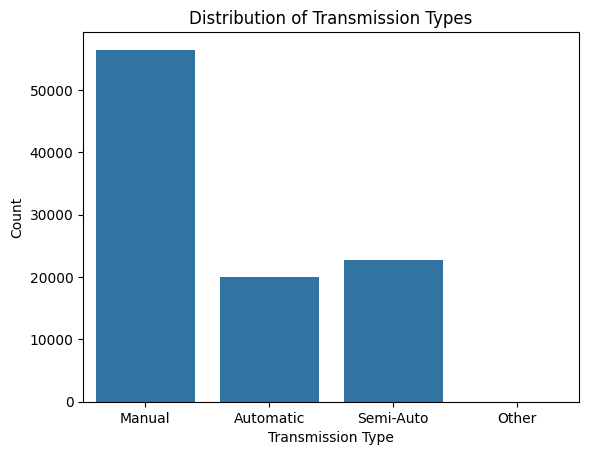

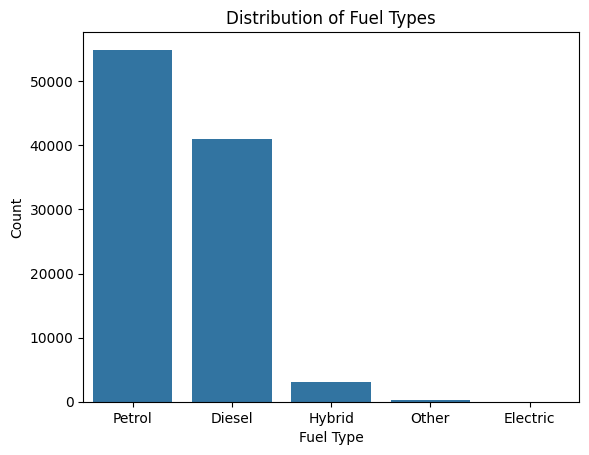

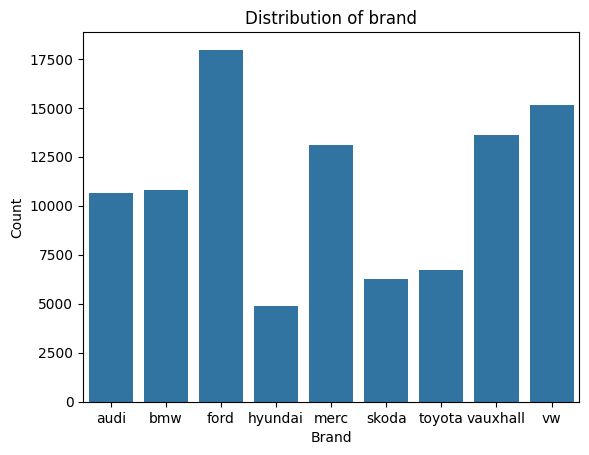

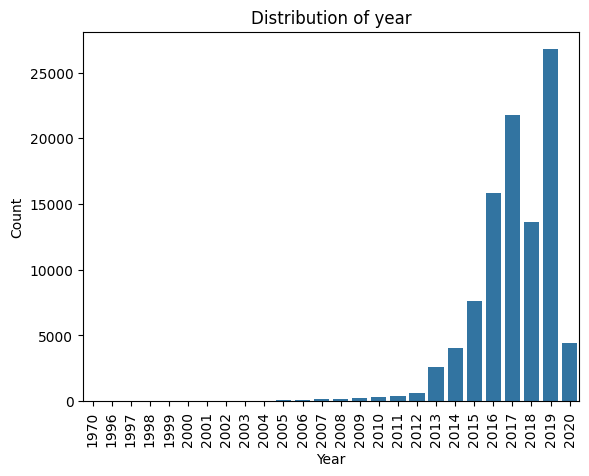

Text(0, 0.5, 'Price')

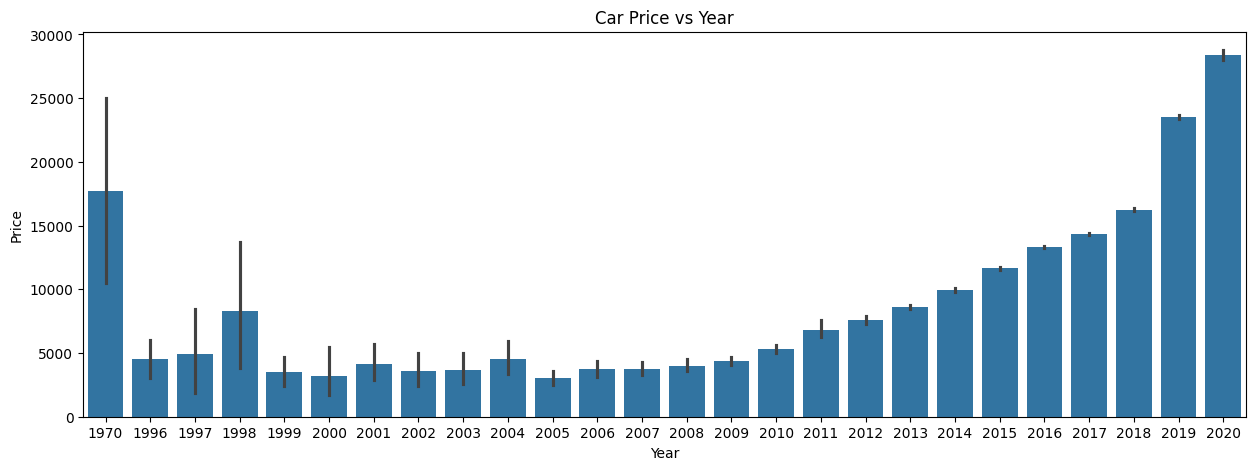

In [10]:
# Plotting the count of each category in the 'transmission' column
sns.countplot(x=full_datasets_cleaned["transmission"])
plt.title("Distribution of Transmission Types")  # Adding a title to the plot
plt.xlabel("Transmission Type")  # Adding a label to the x-axis
plt.ylabel("Count")  # Adding a label to the y-axis
plt.show()  # Display the plot

# Plotting the count of each category in the 'fuelType' column
sns.countplot(x=full_datasets_cleaned["fuelType"])
plt.title("Distribution of Fuel Types")  # Adding a title to the plot
plt.xlabel("Fuel Type")  # Adding a label to the x-axis
plt.ylabel("Count")  # Adding a label to the y-axis
plt.show()  # Display the plot

# Plotting the count of each category in the 'brand' column
sns.countplot(x=full_datasets_cleaned["brand"])
plt.title("Distribution of brand")  # Adding a title to the plot
plt.xlabel("Brand")  # Adding a label to the x-axis
plt.ylabel("Count")  # Adding a label to the y-axis
plt.show()  # Display the plot

# Plotting the count of each category in the 'year' column
sns.countplot(x=full_datasets_cleaned["year"])
plt.title("Distribution of year")  # Adding a title to the plot
plt.xlabel("Year")  # Adding a label to the x-axis
plt.ylabel("Count")  # Adding a label to the y-axis
# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)
plt.show()  # Display the plot

plt.figure(figsize=(15,5),facecolor='w')
sns.barplot(x = full_datasets_cleaned["year"], y = full_datasets_cleaned["price"])
plt.title("Car Price vs Year")  # Adding a title to the plot
plt.xlabel("Year")  # Adding a label to the x-axis
plt.ylabel("Price")  # Adding a label to the y-axis

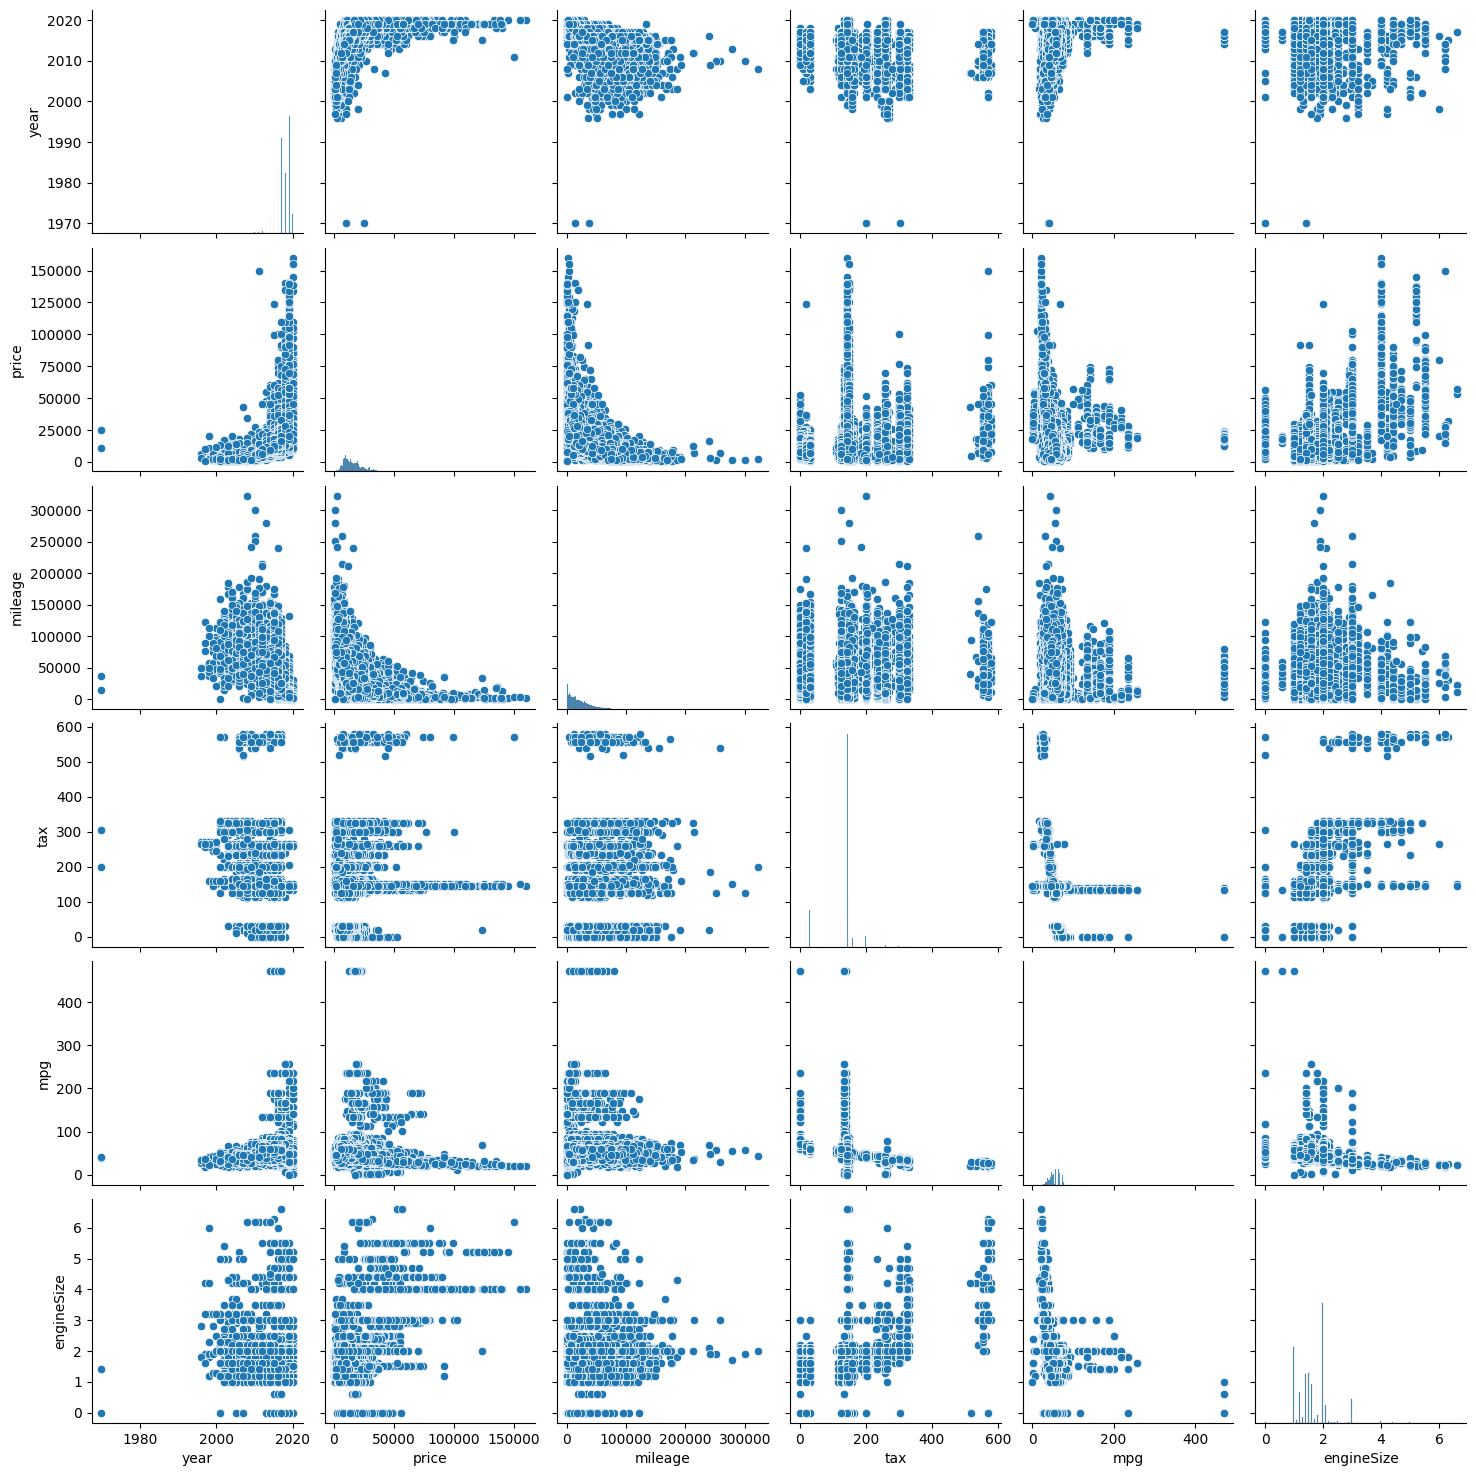

In [11]:
sns.pairplot(full_datasets_cleaned)

In [12]:
full_datasets_cleaned

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0,vw
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2,vw
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4,vw
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2,vw


In [13]:
# Calculate the age of each car and create a new column 'age_of_car'
# The age is calculated by subtracting the 'year' column from 2020
# The dataset is being collected in the year 2020
full_datasets_cleaned["Car_Age"] = 2020 - full_datasets_cleaned["year"]

# Drop the original 'year' column from the DataFrame
full_datasets_cleaned = full_datasets_cleaned.drop(columns=["year"])

full_datasets_cleaned.head()

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,Car_Age
0,A1,12500,Manual,15735,Petrol,150,55.4,1.4,audi,3
1,A6,16500,Automatic,36203,Diesel,20,64.2,2.0,audi,4
2,A1,11000,Manual,29946,Petrol,30,55.4,1.4,audi,4
3,A4,16800,Automatic,25952,Diesel,145,67.3,2.0,audi,3
4,A3,17300,Manual,1998,Petrol,145,49.6,1.0,audi,1


In [14]:
full_datasets_cleaned_dummed = pd.get_dummies(full_datasets_cleaned)
full_datasets_cleaned_dummed.head()
# std = StandardScaler()
# full_datasets_cleaned_dummed_std = std.fit_transform(full_datasets_cleaned_dummed)
full_datasets_cleaned_dummed_std = pd.DataFrame(full_datasets_cleaned_dummed, columns = full_datasets_cleaned_dummed.columns)
print(full_datasets_cleaned_dummed_std.shape)
full_datasets_cleaned_dummed_std.head()
X_scaled = full_datasets_cleaned_dummed_std.drop(columns=["price"])

(99186, 219)


In [15]:
# num_vars = ["Car_Age", "mileage", "tax", "mpg", "engineSize"]
# cat_vars = ["brand", "fuelType", "transmission", "model"]

# full_pipeline = ColumnTransformer([
#     ("num", StandardScaler(), num_vars),
#     ("cat", OneHotEncoder(), cat_vars)
# ])

# the_data_transformed = full_pipeline.fit_transform(full_datasets_cleaned)
# the_data_transformed = the_data_transformed.toarray()
# X_scaled = pd.DataFrame(the_data_transformed)

In [16]:
y = full_datasets_cleaned_dummed_std['price']

# Split the data into training and validation sets 60/20/20
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Verify the shape of the concatenated dataframes
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

# Print the shapes of the target dataframes
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (59511, 218)
X_val shape: (19837, 218)
X_test shape: (19838, 218)
y_train shape: (59511,)
y_val shape: (19837,)
y_test shape: (19838,)


In [17]:
X_train.head()

,mileage,tax,mpg,engineSize,Car_Age,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,...,fuelType_Petrol,brand_audi,brand_bmw,brand_ford,brand_hyundai,brand_merc,brand_skoda,brand_toyota,brand_vauxhall,brand_vw
4357,20651,125,52.3,1.0,3,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
356,39057,20,74.3,1.5,4,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2558,5500,145,37.2,2.0,1,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
4651,40514,125,51.4,1.4,4,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
9164,36000,145,44.8,2.0,3,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [18]:
# def preprocessor(df):
#     # Step 1: Convert categorical variables into dummy/indicator variables
#     # This step transforms categorical columns into a series of binary (0 or 1) columns
#     df = pd.get_dummies(df, drop_first=True)

#     # Step 2: Initialize the StandardScaler
#     # StandardScaler standardizes features by removing the mean and scaling to unit variance
#     # This ensures that each feature contributes equally to the model, which is important for models sensitive to feature scaling
#     scaler = StandardScaler()

#     # Step 3: Fit the scaler to the DataFrame
#     # The scaler calculates the mean and standard deviation for each feature, which will be used for scaling
#     scaled_df = scaler.fit_transform(df)
#     scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

#     # Return the DataFrame with the dummy variables (but still unscaled)
#     return scaled_df

# # Apply the preprocessor function to the cleaned dataset
# # This function will convert categorical features into dummy variables
# # The result is a DataFrame with binary columns for categorical data and untransformed numerical data
# # scaled_full_dataset = preprocessor(full_datasets_cleaned)
# scaled_full_dataset = full_datasets_cleaned_dummed_std

In [19]:
lr = LinearRegression().fit(X_train_val,y_train_val)
y_pred_test = pd.DataFrame(lr.predict(X_test))

In [20]:
y_pred_test.head()

,0
0,11701.550390
1,18795.398556
2,19404.047547
3,23092.496445
4,12620.539996


In [21]:
X_test

,mileage,tax,mpg,engineSize,Car_Age,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,...,fuelType_Petrol,brand_audi,brand_bmw,brand_ford,brand_hyundai,brand_merc,brand_skoda,brand_toyota,brand_vauxhall,brand_vw
10532,14044,150,64.2,1.1,2,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
4995,14258,150,53.3,1.4,2,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
9013,15,145,65.7,2.0,1,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
55,24568,145,31.7,2.0,2,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
5204,11373,30,54.3,1.0,3,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2468,3541,145,74.3,1.5,1,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
13593,40181,145,42.8,3.0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5866,18040,145,53.3,2.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7637,75000,30,62.8,2.0,8,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [22]:
y_test.head()

,price
10532,9679
4995,17750
9013,19500
55,19995
5204,11891


In [23]:
# Evaluate the performance of the linear regression model for the Full  dataset
# Calculate R²
r2 = r2_score(y_test, y_pred_test)
print(f'R² on test data: {r2}')

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error on test data: {mse}')

# Calculate Mean Absolute Percentage Error
mape = mean_absolute_percentage_error(y_test, y_pred_test)
print(f'Mean Absolute Percentage Error on test data: {mape}')

R² on test data: 0.8731873399238201
Mean Squared Error on test data: 12103687.687074404
Mean Absolute Percentage Error on test data: 0.17784882912695665


In [24]:
from sklearn.model_selection import cross_val_score, KFold

# Define the linear regression model
lr = LinearRegression()

# Set up cross-validation
# Here we use K-Fold cross-validation with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get scores
# We'll use the negative mean squared error (MSE) for evaluation since cross_val_score minimizes the score by default
cv_scores_mse = cross_val_score(lr, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores_mse = -cv_scores_mse

# Print the cross-validation scores for each fold and the average score
print(f'Cross-validation MSE scores for each fold: {cv_scores_mse}')
print(f'Average Cross-validation MSE: {np.mean(cv_scores_mse)}')

# If you want to compute R^2 and MAPE for cross-validation, you can perform them separately
cv_scores_r2 = cross_val_score(lr, X_scaled, y, cv=kf, scoring='r2')
print(f'Cross-validation R² scores for each fold: {cv_scores_r2}')
print(f'Average Cross-validation R²: {np.mean(cv_scores_r2)}')

cv_scores_mape = cross_val_score(lr, X_scaled, y, cv=kf, scoring='neg_mean_absolute_percentage_error')
cv_scores_mape = -cv_scores_mape
print(f'Cross-validation MAPE scores for each fold: {cv_scores_mape}')
print(f'Average Cross-validation MAPE: {np.mean(cv_scores_mape)}')

Cross-validation MSE scores for each fold: [12103687.68707441 13087806.84486789 14361778.0983869  14292903.78519989
 14686817.68480694]
Average Cross-validation MSE: 13706598.820067206
Cross-validation R² scores for each fold: [0.87318734 0.86069431 0.85603875 0.85542147 0.85122859]
Average Cross-validation R²: 0.8593140937246533
Cross-validation MAPE scores for each fold: [0.17784883 0.17904685 0.18308373 0.17675735 0.17228652]
Average Cross-validation MAPE: 0.17780465565709397
